In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#loading the dataset
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Spam Ham Classifier/Dataset.csv",encoding="latin",names=['Labels','Messeges'])

In [ ]:
#Showing few records from actual dataset
dataset.head()

,Labels,Messeges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset.columns

Index(['Labels', 'Messeges'], dtype='object')

In [ ]:
#check the size of dataset
dataset.shape

(5572, 2)

In [ ]:
#check for null records
dataset.isnull().count()

Labels      5572
Messeges    5572
dtype: int64

In [ ]:
#importing libraries required for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Number of samples of each class')

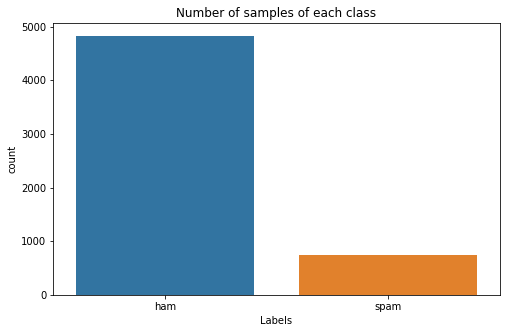

In [ ]:
#visualizing the count of spam and normal messeges
plt.figure(figsize=(8,5))
sns.countplot(x='Labels',data=dataset)
plt.title("Number of samples of each class")

In [ ]:
dataset['Labels'].value_counts()

ham     4825
spam     747
Name: Labels, dtype: int64

In [ ]:
#let's seperate dependent and independent varibles 
x = dataset['Messeges']
y = dataset['Labels']

In [ ]:
#importing libraries required for data pre processing
import nltk
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#creating corpus from the dataset

def Create_Corpus(x):
  corpus = []

  for i in range(len(x)):

    #don't to do not
    message = re.sub(pattern='don\'t',repl="do not",string=x.get(i))

    #won't to will not
    message = re.sub(pattern='won\'t',repl="will not",string=message)

    #Keeping only alphabetical words, removing special characters and numbers
    message = re.sub(pattern='[^a-zA-Z]',repl=' ',string=message)

    #To Lowercase
    message = message.lower()

    #spliting the sentence in words 
    words = message.split()

    #using lemmatizer
    words = [lemmatizer.lemmatize(word) for word in words]

    sentence = ' '.join(words)
    corpus.append(sentence)
  return corpus

corpus = Create_Corpus(x)
corpus[0:5]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i do not think he go to usf he life around here though']

In [ ]:
#Bag of words / CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)
X = cv.fit_transform(corpus)

In [ ]:
X.shape

(5572, 3000)

In [ ]:
#let's split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape

(4457, 3000)

In [ ]:
x_test.shape

(1115, 3000)

In [ ]:
#Building the model 
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#predicting test samples
y_pred = nb.predict(x_test)

In [ ]:
#check accuracy, confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
acc = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
print("-----------Accuracy of the model-----------")
print("Accuracy : {}%".format(round(acc*100,2)))
print("Confusion Matrix : \n{}".format(conf_mat))

-----------Accuracy of the model-----------
Accuracy : 98.65%
Confusion Matrix : 
[[944   5]
 [ 10 156]]


In [ ]:
#Sample test example 1
a=cv.transform(["Hellow how are you i am fine"])

In [ ]:
nb.predict(a)

array(['ham'], dtype='<U4')

In [ ]:
#Sample test example 2
a=cv.transform(["Hi you have won lotery of crore congratulations"])
nb.predict(a)

array(['spam'], dtype='<U4')

In [ ]:
# Now as our model is performing well, let's save the model in pickle file to use in our web app
import pickle
transform_file = "transform.pkl"
model_file = "model.pkl"
pickle.dump(cv,open(transform_file,"wb"))
pickle.dump(nb,open(model_file,"wb"))